In [2]:
# Importing libraries for classic Python operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import libraries for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Importing libraries for model selection
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Importing libraries for results analysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import seaborn

from xgboost import plot_importance
from xgboost import plot_tree
from matplotlib.pylab import rcParams

# Importing the library for the model under test
from xgboost import XGBClassifier

import pickle

# XGBoost 

## I) Theory

XGBoost is a gradient boosting ensemble Machine Learning technique based on decision trees.
We've already seen what the terms decision tree, bagging and random forest mean in the Random Forest section, so let's take a closer look at what's new in XGBoost.

### 1) What does boosting mean ?

Boosting is an ensemble strategy that adds new models to repair faults generated by current models. First, a model is constructed using the training data. The second model is then constructed in an attempt to address the faults in the previous model and models are added sequentially until no further advancements are possible. This ensemble method attempts to build a powerful classifier using previously 'weaker' classifiers.

### 2) What does gradient means ?

Gradient boosting is so named because it employs a gradient descent approach to minimize loss when adding new models.

### 3) What does eXtreme mean

XGBoost (eXtreme Gradient Boosting) is an advanced implementation of a gradient boosting algorithm.

## II) Advantages and Drawbacks

Advantages

-  XGBoost Execution Speed:
XGBoost is generally quick compared to other gradient boosting implementations.

- Performance: XGBoost has a strong track record of producing high-quality results in various machine learning tasks, especially in Kaggle competitions, where it has been a popular choice for winning solutions.

- Regularization :
Standard GBM implementation has no regularization like XGBoost; therefore, it also helps to reduce overfitting. In fact, XGBoost is also known as a ‘regularized boosting‘ technique.

- High Flexibility:
XGBoost allows users to define custom optimization objectives and evaluation criteria. This adds a whole new dimension to the model and there is no limit to what we can do.

- Handling Missing Values:
XGBoost has an in-built routine to handle missing values. The user is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in the future.

- Interpretability: Unlike some machine learning algorithms that can be difficult to interpret, XGBoost provides feature importances, allowing for a better understanding of which variables are most important in making predictions.

Drawbacks

- Computational Complexity:
XGBoost can be computationally intensive, especially when training large models, making it less suitable for resource-constrained systems.

- Overfitting: XGBoost can be prone to overfitting, especially when trained on small datasets or when too many trees are used in the model

- Hyperparameter Tuning: XGBoost has many hyperparameters that can be adjusted, making it important to properly tune the parameters to optimize performance. However, finding the optimal set of parameters can be time-consuming and requires expertise.

- Memory Requirements: XGBoost can be memory-intensive, especially when working with large datasets, making it less suitable for systems with limited memory resources.

## III) Python Implementation

### 1) Hyperparameters tuning

#### General Parameters

The general parameter are here to access overall functionalities

- booster Select the type of model to run at each iteration. It has 2 options:
gbtree: tree-based models
gblinear: linear models

We will use in this project tree-based models due to its performance

#### Booster Parameters for Tree Booster

There are 2 types of booster parameters, one for linear and another for tree but we will only consider tree booster here.

1. Eta is also known as the learning rate; changing this number makes the model more robust by decreasing the weights on each step.

2. Max_depth, it is the same as what we saw for the random forest

3. gamma 
Only when the resulting split results in a positive reduction in the loss function is a node split. The minimal loss reduction necessary to divide is specified by Gamma. This makes the algorithm more conservative. The values can and should change based on the loss function.

4. subsample 
The percentage of observations that are random samples for each tree. Lower values make the algorithm more conservative and prevent overfitting, but too low values may result in underfitting.

5. colsample_bytree, it is the same as max_features for random forest


#### Learning Task Parameters

1. objective 
This defines the loss function to be minimized. We will use "multi: softmax" which is a multiclass classification using the softmax objective. It will return predicted class.

2. eval_metric 
The evaluation metrics are to be used for validation data.
merror – Multiclass classification error rate 
mlogloss – Multiclass logloss


In [3]:
df =  pd.read_csv(r"result_final\data_feature_final.cvs")

columns = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']
x = df[columns]
y = df["class"].values
le = LabelEncoder()
y = le.fit_transform(y)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)# Check the number of records in training and testing dataset.
print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

df

The training dataset has 27630 records.
The testing dataset has 6908 records.


,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,class
0,0,242592.598425,0.593614,0.488337,4.897638,-9.927843,0.700787,0.068580,0.448980,0.095733,0.163209,0.388076,118.583102,3.968504,23.133858,chill
1,1,218104.179245,0.516387,0.502206,5.320755,-8.413877,0.877358,0.047183,0.439532,0.066846,0.148711,0.368712,120.718953,3.830189,15.858491,chill
2,2,239831.728395,0.577444,0.712062,5.666667,-5.914531,0.777778,0.054841,0.198941,0.048222,0.163510,0.498421,118.111889,3.987654,44.765432,chill
3,3,252627.500000,0.523500,0.492458,5.666667,-9.228333,0.708333,0.042979,0.484721,0.111333,0.141708,0.310375,117.011833,3.958333,17.791667,chill
4,4,245509.795455,0.561864,0.676841,5.318182,-6.948432,0.795455,0.056202,0.217021,0.246952,0.226589,0.496373,134.570545,3.954545,17.181818,chill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34533,34533,214466.776739,0.301887,0.122628,5.187410,-21.292120,0.693157,0.044125,0.898156,0.862361,0.117679,0.101661,109.138436,3.475523,19.300361,study
34534,34534,228149.070317,0.473481,0.343781,4.066208,-11.875776,0.746330,0.048961,0.630701,0.195379,0.128111,0.293392,116.315158,3.802905,26.378136,study
34535,34535,359851.247414,0.543982,0.469619,4.954568,-11.038333,0.722978,0.042697,0.399941,0.357020,0.124191,0.296984,112.435929,3.628299,20.556140,study
34536,34536,239369.042276,0.324145,0.210281,4.712223,-19.713278,0.644015,0.041559,0.773073,0.826123,0.132513,0.113487,107.658569,3.657880,18.066501,study


### 2) Study of the various hyperparameters

Next, we'll look at each of the hyperparameters to understand the consequences of changing them on the model.

#### Maximum Depth

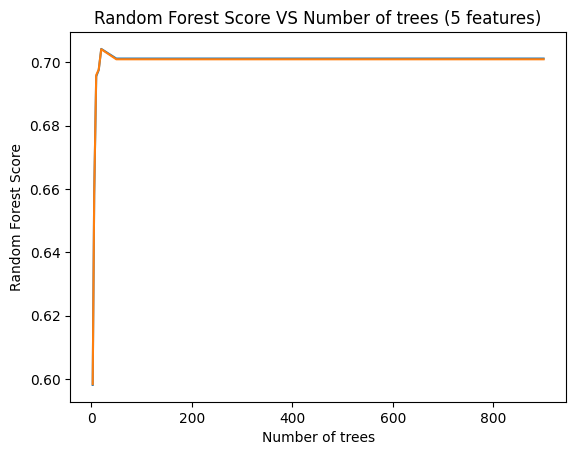

In [4]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [3, 6, 10, 15, 20, 50, 100, 200, 300, 500, 900]

for i in list_para:
    model = XGBClassifier(max_depth = i, objective='multi:softmax',num_class=7)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

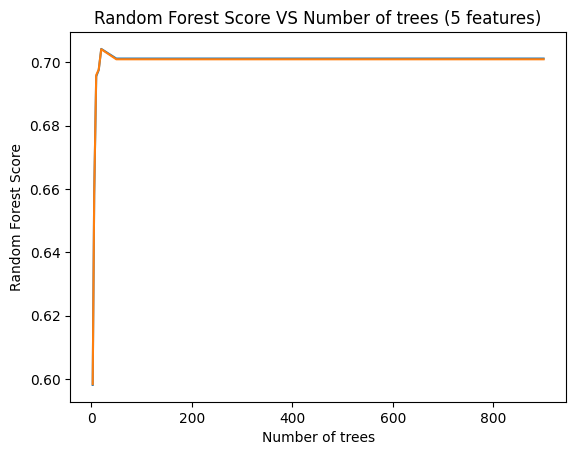

In [10]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [3, 6, 10, 15, 20, 50, 100, 200, 300, 500, 900]

for i in list_para:
    model = XGBClassifier(max_depth = i, objective='multi:softmax',num_class=7)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

We can analyze the maximum depth as follows: before the maximum depth is 10, our model underfits, and after 10, it overfits. This analysis has enabled us to find a good estimate of this parameter. The number we can estimate as satisfactory is 10.

#### Learning Rate

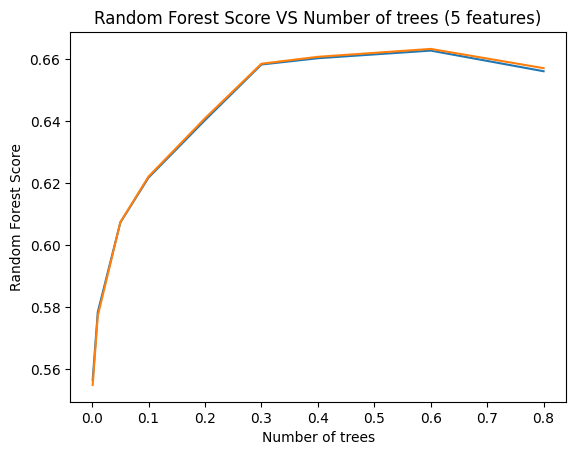

In [11]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8]

for i in list_para:
    model = XGBClassifier(learning_rate = i, objective='multi:softmax',num_class=7)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

We can say the same thing, the optimal number for the learning rate is 0.6.

#### Gama

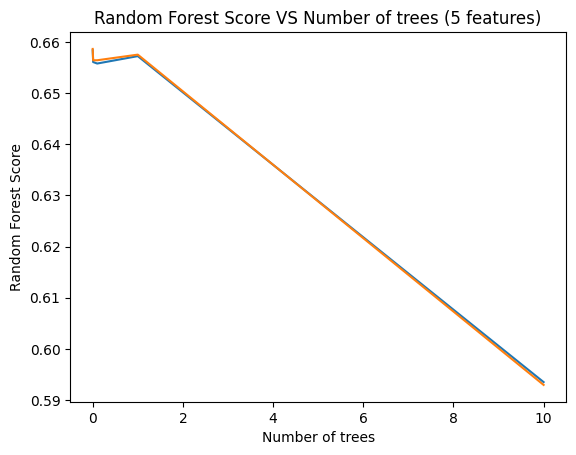

In [12]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [0, 0.01, 0.1, 1, 10]

for i in list_para:
    model = XGBClassifier(gamma = i, objective='multi:softmax',num_class=7)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

For the Gamma parameter it is 1

#### Subsample

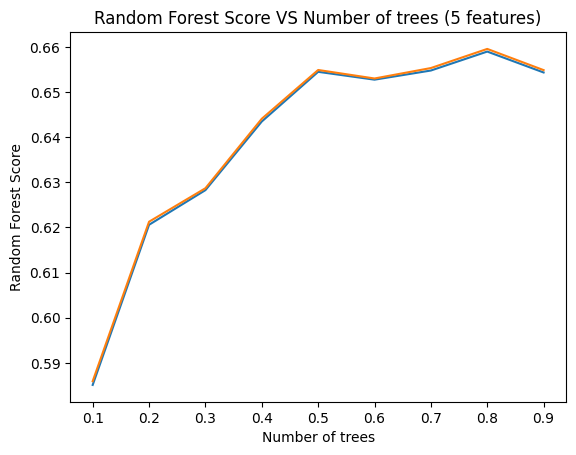

In [13]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = np.arange(0.1, 1.0, 0.1)

for i in list_para:
    model = XGBClassifier(subsample = i, objective='multi:softmax',num_class=7)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

The optimal parameter for the subsample is 0.8

#### Colsample by Tree

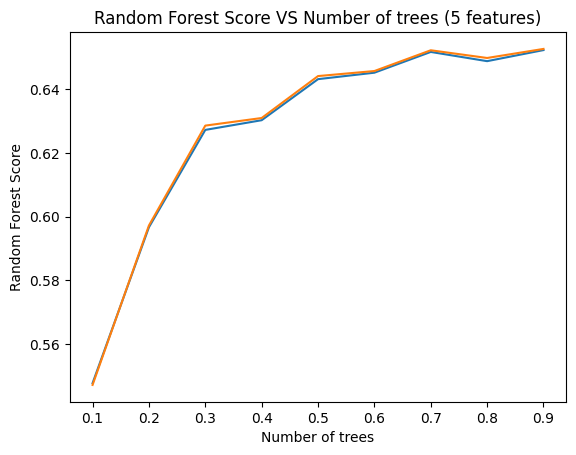

In [14]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = np.arange(0.1, 1.0, 0.1)

for i in list_para:
    model = XGBClassifier(colsample_bytree = i, objective='multi:softmax',num_class=7)
    model.fit(X_train,y_train)
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(accuracy_score(y_test, output))
    opt_table_estimators_f1.append(f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

Apparagent for the parameter colsample by tree the model doesn't manage to overfitter, in which case we can't yet find an ideal parameter. So we're going to introduce Grid Search.
### 3) Grid Search automatisation

Fitting 5 folds for each of 1 candidates, totalling 5 fits


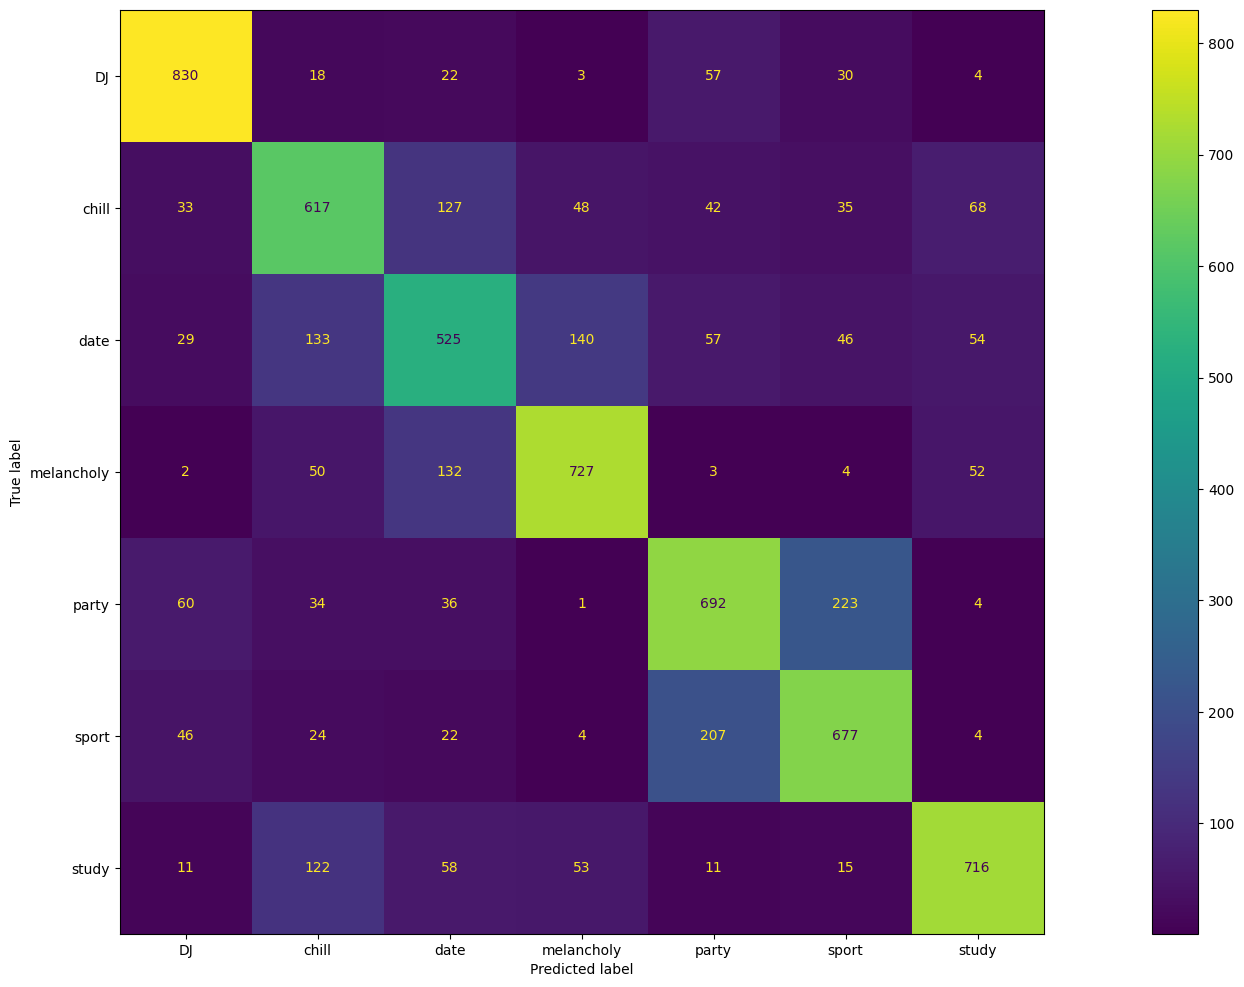

              precision    recall  f1-score   support

          DJ       0.82      0.86      0.84       964
       chill       0.62      0.64      0.63       970
        date       0.57      0.53      0.55       984
  melancholy       0.74      0.75      0.75       970
       party       0.65      0.66      0.65      1050
       sport       0.66      0.69      0.67       984
       study       0.79      0.73      0.76       986

    accuracy                           0.69      6908
   macro avg       0.69      0.69      0.69      6908
weighted avg       0.69      0.69      0.69      6908



{'colsample_bytree': 1,
 'eval_metric': 'mlogloss',
 'gamma': 0.001,
 'learning_rate': 0.3,
 'max_depth': 10,
 'subsample': 1}

In [45]:
params = {'max_depth': [10],
            'learning_rate': [0.3],
            'gamma': [0.001],
            'subsample': [1],
            'colsample_bytree': [1],
            'eval_metric': ['mlogloss']
            }

model = XGBClassifier


def model_best_param(X_train, X_test, y_train, y_test, model, params):

    pipe_nb = make_pipeline(
    model(num_class=7, objective='multi:softmax')
    )
    grid_search = GridSearchCV(estimator=model(), param_grid=params, verbose=2, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    output = grid_search.predict(X_test)
    
    output = le.inverse_transform(output)
    y_test = le.inverse_transform(y_test)

    conf_mat = confusion_matrix(y_test, output)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ["DJ", "chill", "date", "melancholy", "party", "sport", "study"])
    cm_display.plot()
    plt.show() 

    print(classification_report(y_test, output))

    return(grid_search.best_params_)

model_best_param(X_train, X_test, y_train, y_test, model, params)

### 4) Analysis of the best model

In [46]:
model = XGBClassifier(
    objective='multi: softprob',
    max_depth = 10,
    learning_rate = 0.3,
    gamma = 0.001,
    subsample = 1,
    colsample_bytree = 1,
    eval_metric = 'mlogloss'
)

model.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0.001,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

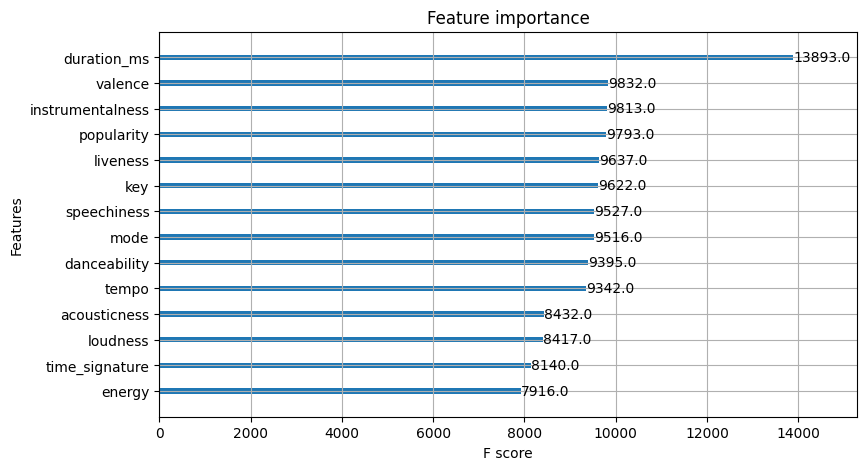

In [49]:
fig, ax = plt.subplots(figsize=(9,5))
plot_importance(model, ax=ax)
plt.show()

In [4]:
with open(r'C:\Users\Thomas Aujoux\Documents\GitHub\reg\fastAPI\app\app2\model\model-0.1.0.pkl', 'wb') as f:
    pickle.dump(model, f)

In [1]:
from joblib import load

# Load the model
model = load(open('model/model-0.1.0.pkl','rb'))
import sklearn
print(sklearn.__version__)

1.3.0


In [4]:
spam_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0.001,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [5]:
Python --version

NameError: name 'Python' is not defined